In [166]:
import numpy as np
from sklearn import datasets
from scipy.sparse import linalg
from numpy.linalg import norm
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Generate a noisy, synthetic data set
x, y = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)

In [168]:
def spectral_clustering(x, k, g=None):
    A = squareform(pdist(x, metric='euclidean'))
    D = np.diag(np.array(A.sum(axis=1)).ravel()) 
    L = D - A
    eigval, eigvec = linalg.eigs(L, k)
    V = eigvec.real
    V_norm = norm(V, axis=1, ord=2)
    Y = (V.T / V_norm).T
    kmeans = KMeans(n_clusters=k, random_state=g)
    return kmeans.fit(Y).labels_

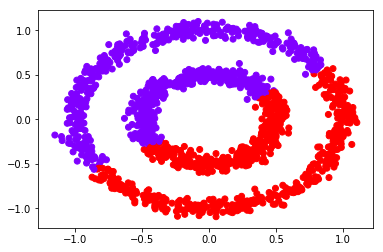

In [172]:
plt.scatter(x[:,0],x[:,1], c=KMeans(n_clusters=2).fit(x).labels_, cmap='rainbow') 

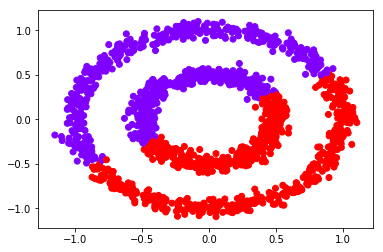

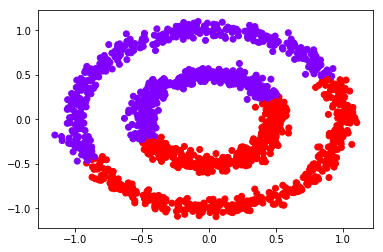

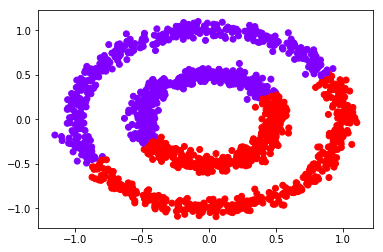

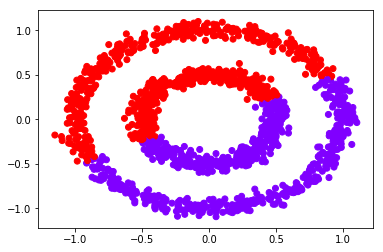

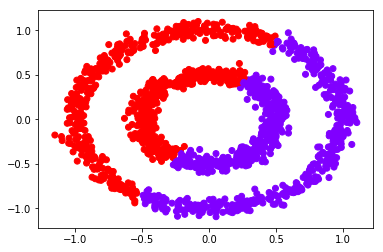

In [174]:
for i in range(5):
    plt.figure()
    plt.scatter(x[:,0],x[:,1], c=spectral_clustering(x,2,i), cmap='rainbow')

In [180]:
import cv2
img = cv2.imread('seg.jpg', 0) 

In [181]:
cv2.imshow('image', img)

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1530774556719/work/modules/highgui/src/window.cpp:356: error: (-215) size.width>0 && size.height>0 in function imshow
